In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [221]:
filename = "datasets/diamonds.csv"
df = pd.read_csv(filename)

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [170]:
df.shape

(53940, 11)

In [171]:
dupe = df.duplicated()
df.loc[dupe]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [172]:
df.shape

(53940, 11)

In [222]:
df = df.drop(df.columns[0] , axis=1)

In [174]:
df.heatmap(df, annot=True, linewidths=.5)

AttributeError: 'DataFrame' object has no attribute 'heatmap'

AttributeError: module 'seaborn' has no attribute 'plt'

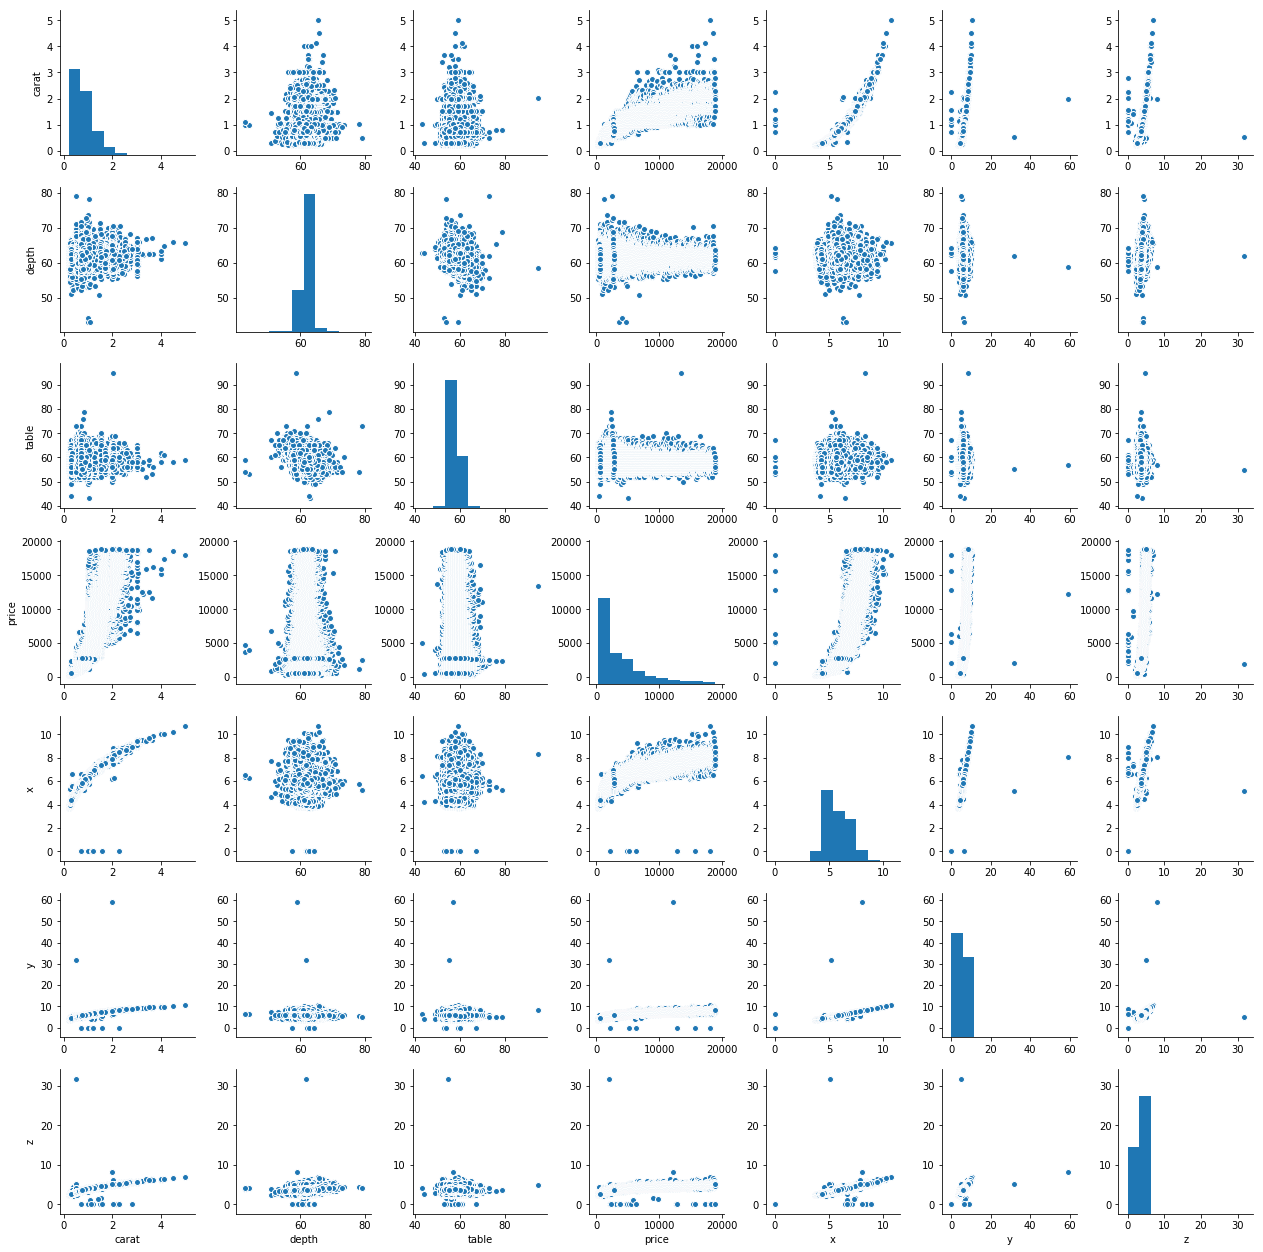

In [175]:
# Basic correlogram
sns.pairplot(df)
sns.plt.show()


In [107]:
df.dtypes

cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [108]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [109]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [110]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

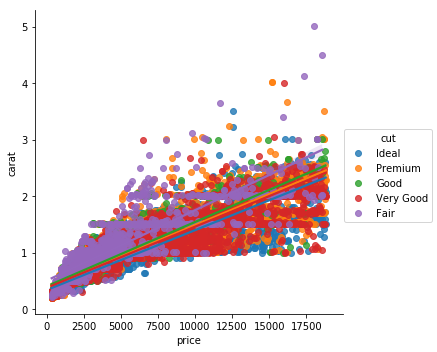

In [120]:
sns.lmplot(x="price", y="carat", hue="cut",
               truncate=True, data=df)


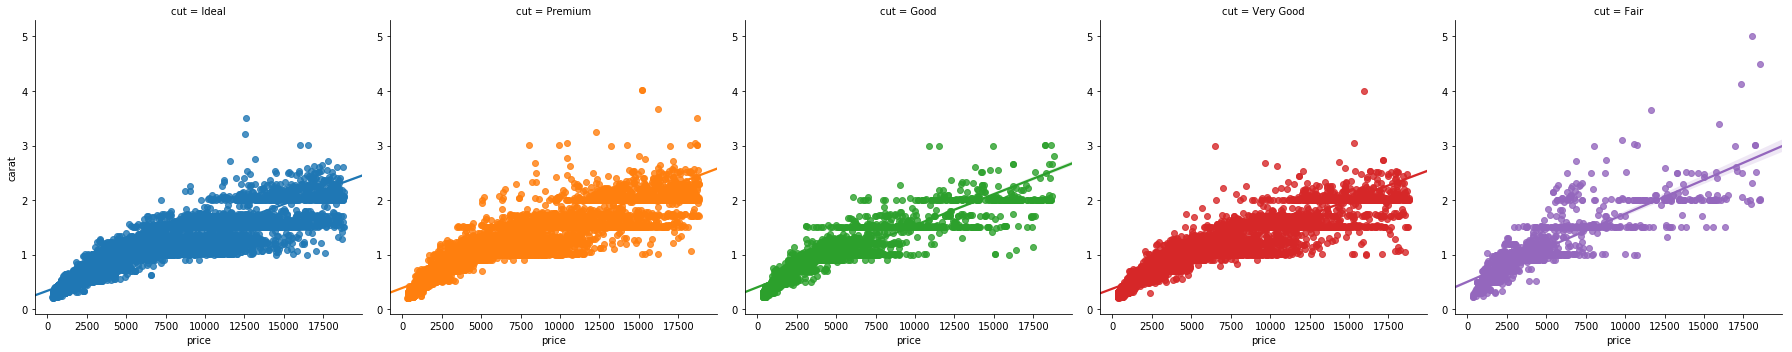

In [121]:
sns.lmplot(x="price", y="carat", col="cut", hue="cut", data=df)

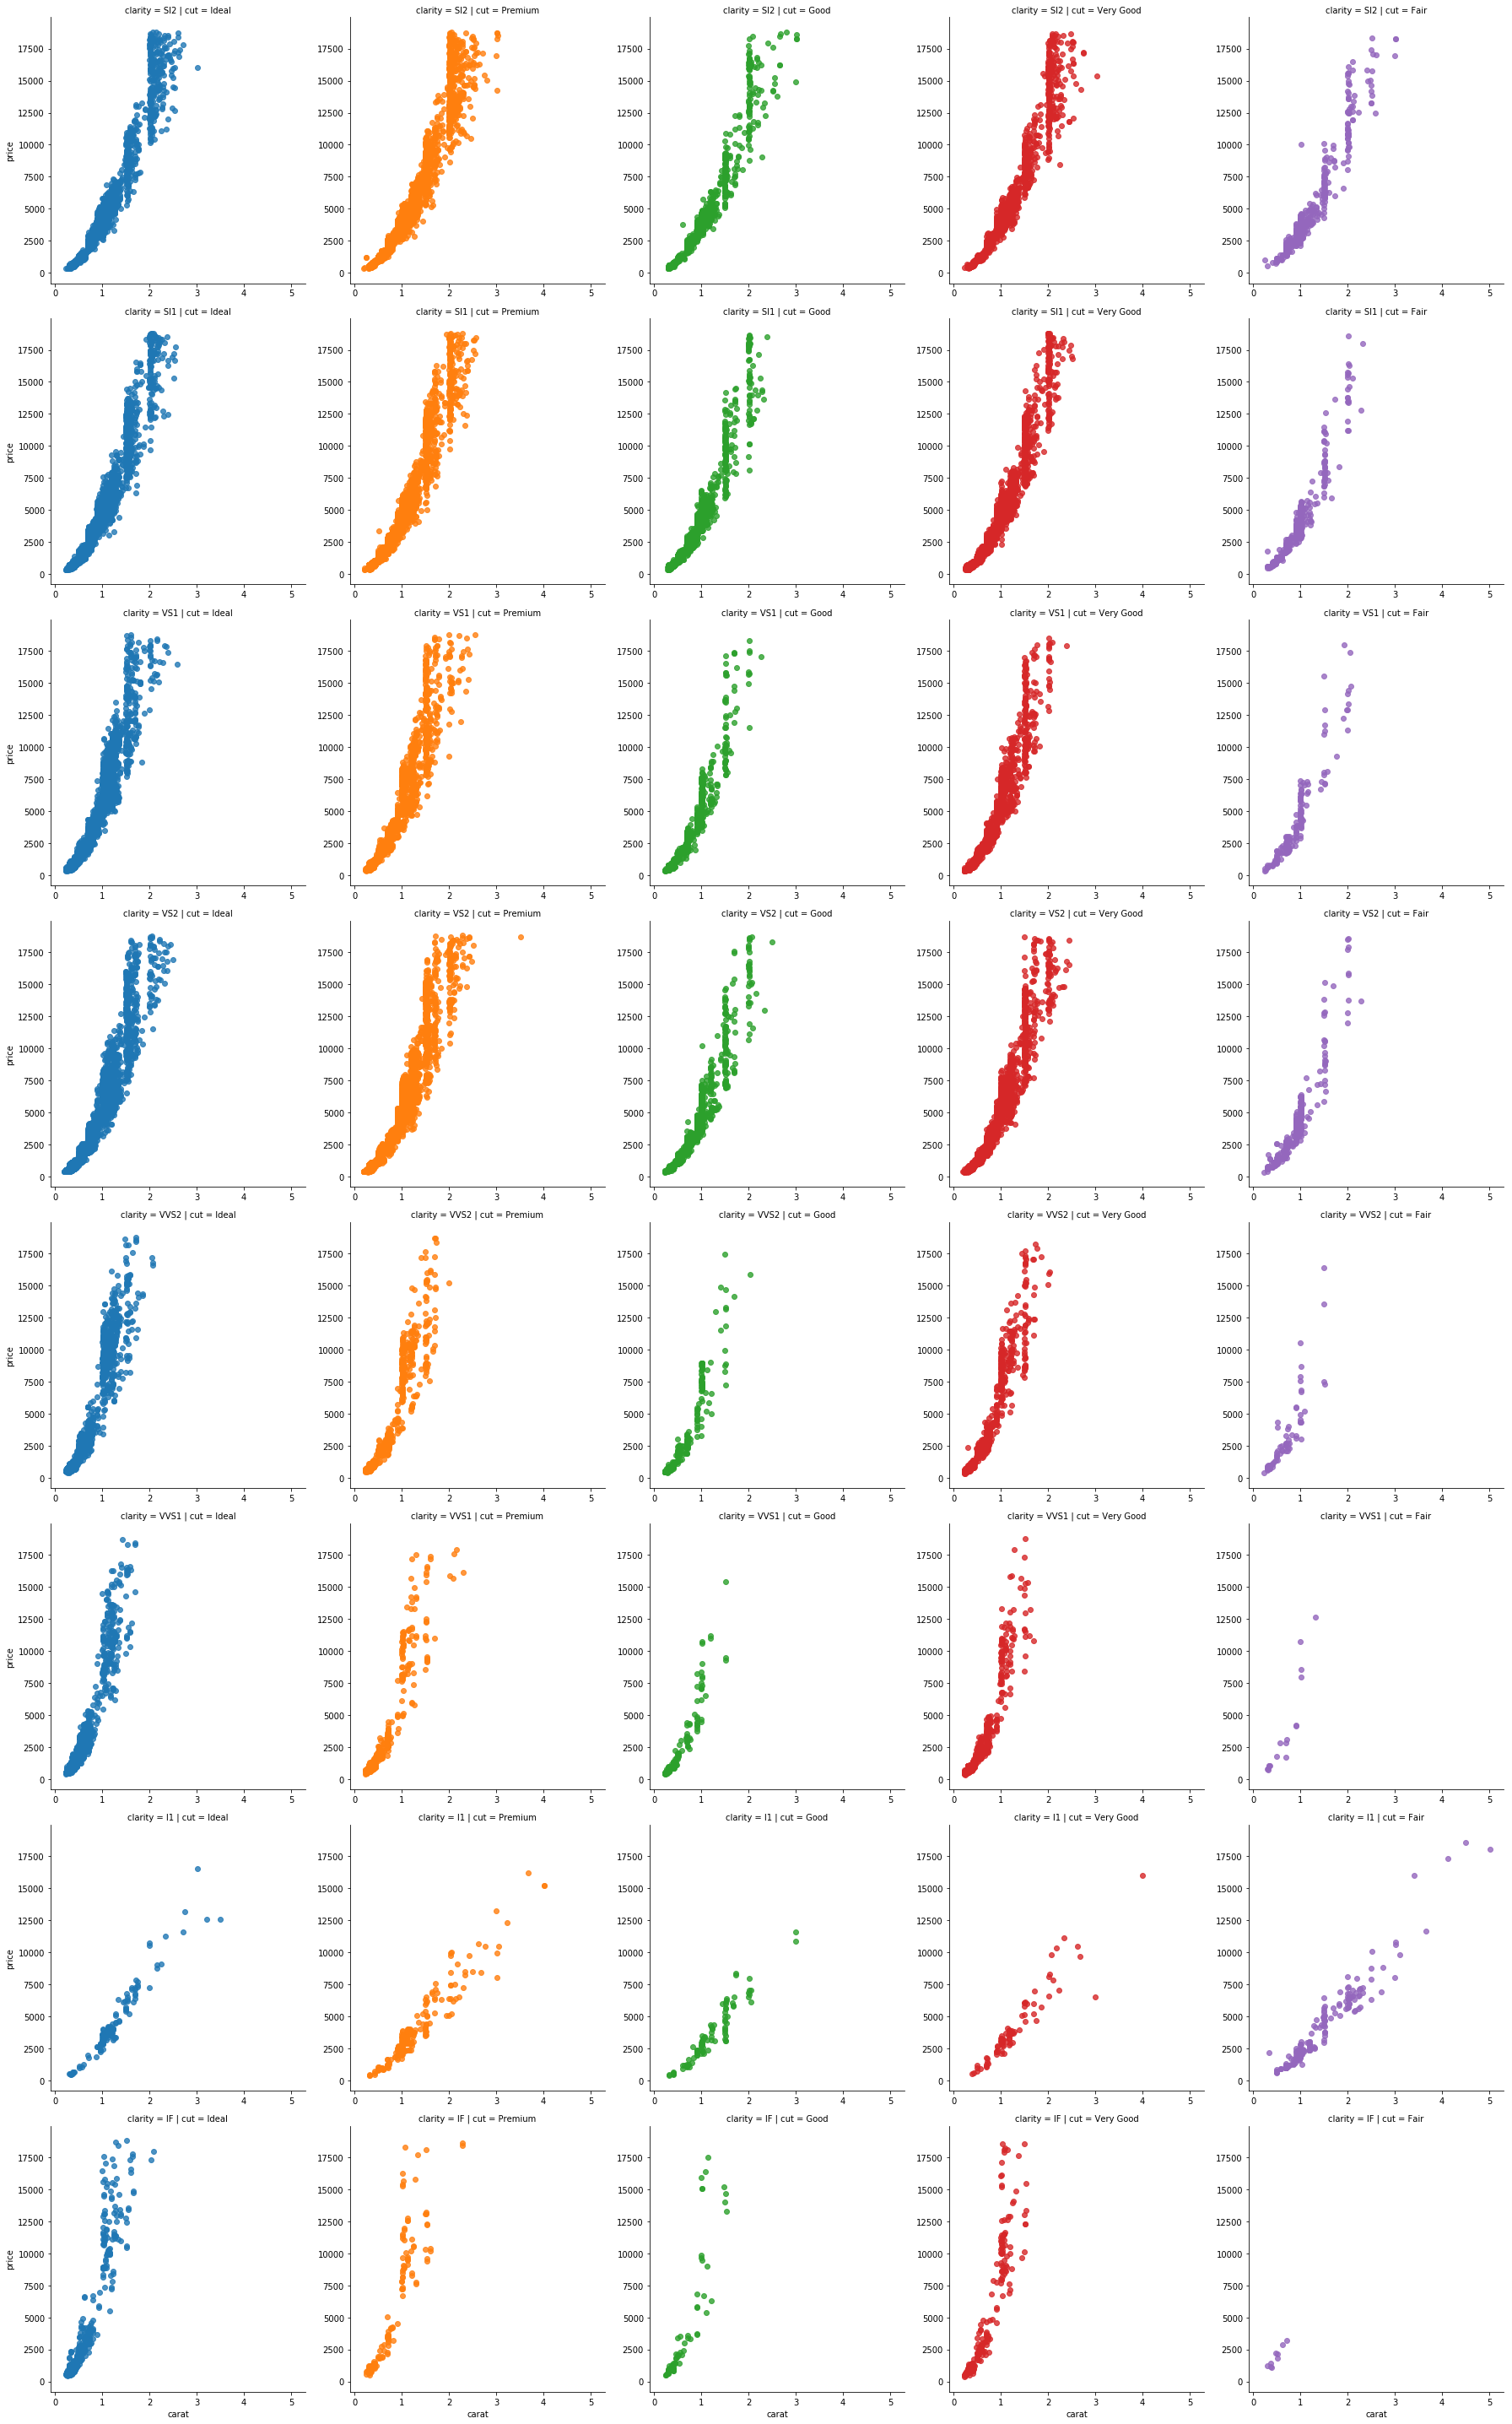

In [122]:
sns.lmplot(x="carat", y="price", col="cut", hue="cut", row = "clarity",  data=df, fit_reg=False)

In [123]:
corr = df.corr()

In [124]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [125]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

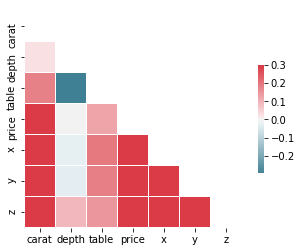

In [126]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
thisdict =	{
  "Ideal": 1,
  "Premium": 4,
  "Good": 2,
   "Very Good": 3,
    "Fair": 0,
}

In [73]:
replace_map = {'cut': {
  "Ideal": 1,
  "Premium": 4,
  "Good": 2,
   "Very Good": 3,
    "Fair": 0,
}}

In [90]:
##labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
##replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

ndf = df.copy()



##print(replace_map_comp)
newdf = ndf.replace({'cut': {
  "Ideal": "1",
  "Premium": "4",
  "Good": "2",
   "Very Good": "3",
    "Fair": "0",
}}, inplace=True)



In [92]:
newdf.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [127]:
#create a dataframe containing the stats for each Pokemon
#drop Total, Stage, and Legendary
stats_df = df.drop(['x', 'y', 'z'], axis=1)
stats_df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


KeyboardInterrupt: 

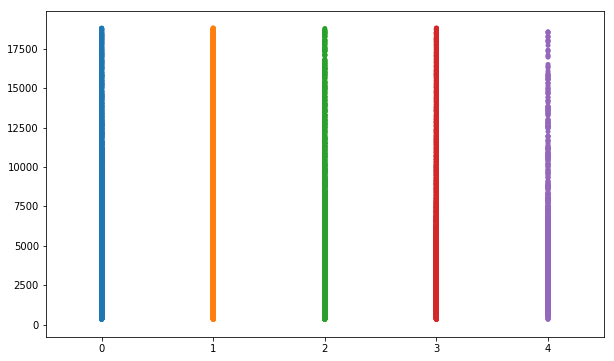

In [129]:
#swarm plot
plt.subplots(figsize=(10,6))
sns.swarmplot(x='cut', y='price', data=stats_df)

In [130]:
cat_df_flights_replace = df.copy()


In [133]:
replace_map = {'cut': {'Ideal': 1, 'Premium': 2, 'Good': 3, 'Very Good': 4,
                                  'Fair': 5}}

In [134]:
print(replace_map)

{'cut': {'Ideal': 1, 'Premium': 2, 'Good': 3, 'Very Good': 4, 'Fair': 5}}


In [135]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)
print(cat_df_flights_replace.head())

NameError: name 'replace_map_comp' is not defined

In [223]:
cutdicttext = {'Ideal': '1 Ideal', 'Premium': '5 Premium', 'Good': '3 Good', 'Very Good': '4 Very Good',
                                  'Fair': '0 Fair'}

In [224]:
cutdictnum = {'Fair': 0, 'Good': 3, 'Ideal': 1, 'Premium': 5, 'Very Good': 4}

In [225]:
ndf = df.replace({"cut": cutdictnum})

In [226]:
ndf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75


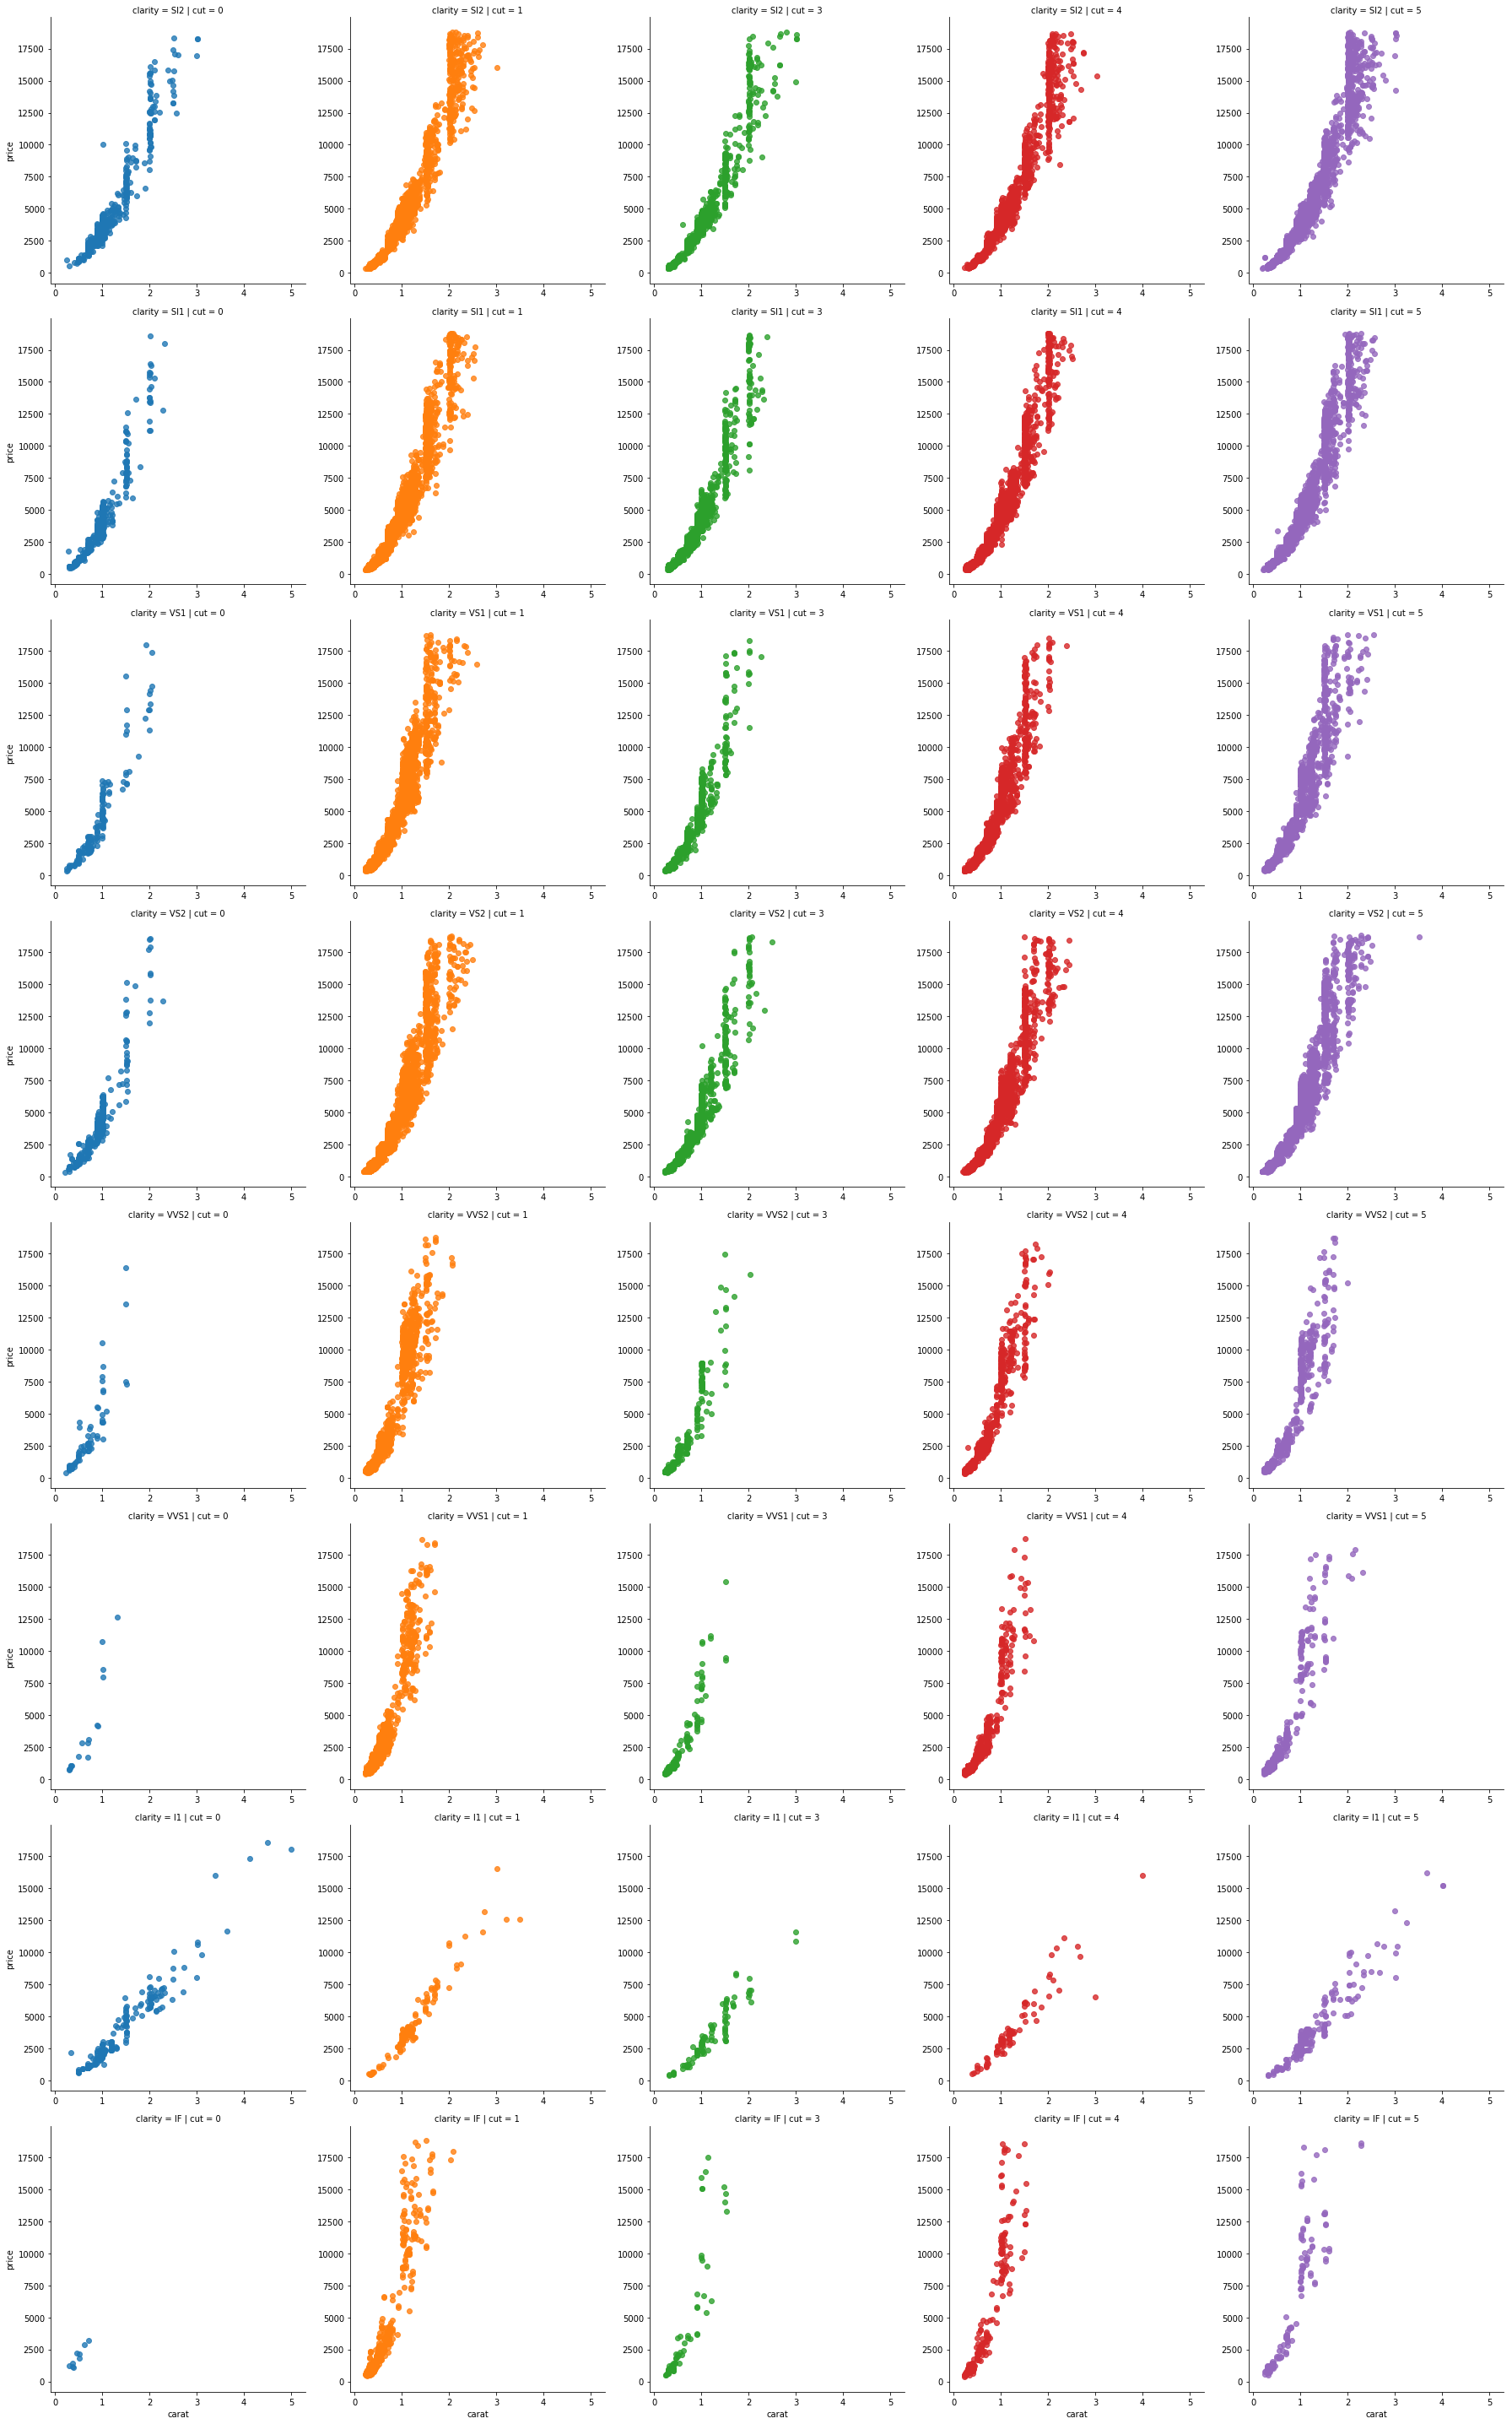

In [179]:
sns.lmplot(x="carat", y="price", col="cut", hue="cut", row = "clarity",  data=ndf, fit_reg=False)

In [227]:
cutdict

{'Fair': 0, 'Good': 3, 'Ideal': 1, 'Premium': 5, 'Very Good': 4}

In [228]:
array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

SyntaxError: unexpected EOF while parsing (<ipython-input-228-900e8428d9e6>, line 1)

In [229]:
claritydictnum = {'SI2': 0, 'SI1': 1, 'VS1': 2, 'VS2': 3, 'VVS2': 4, 'VVS1': 5, 'I1': 6, 'IF': 7}

In [230]:
ndf = ndf.replace({"clarity": claritydictnum})

In [231]:
ndf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,E,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,I,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,0,63.3,58.0,335,4.34,4.35,2.75


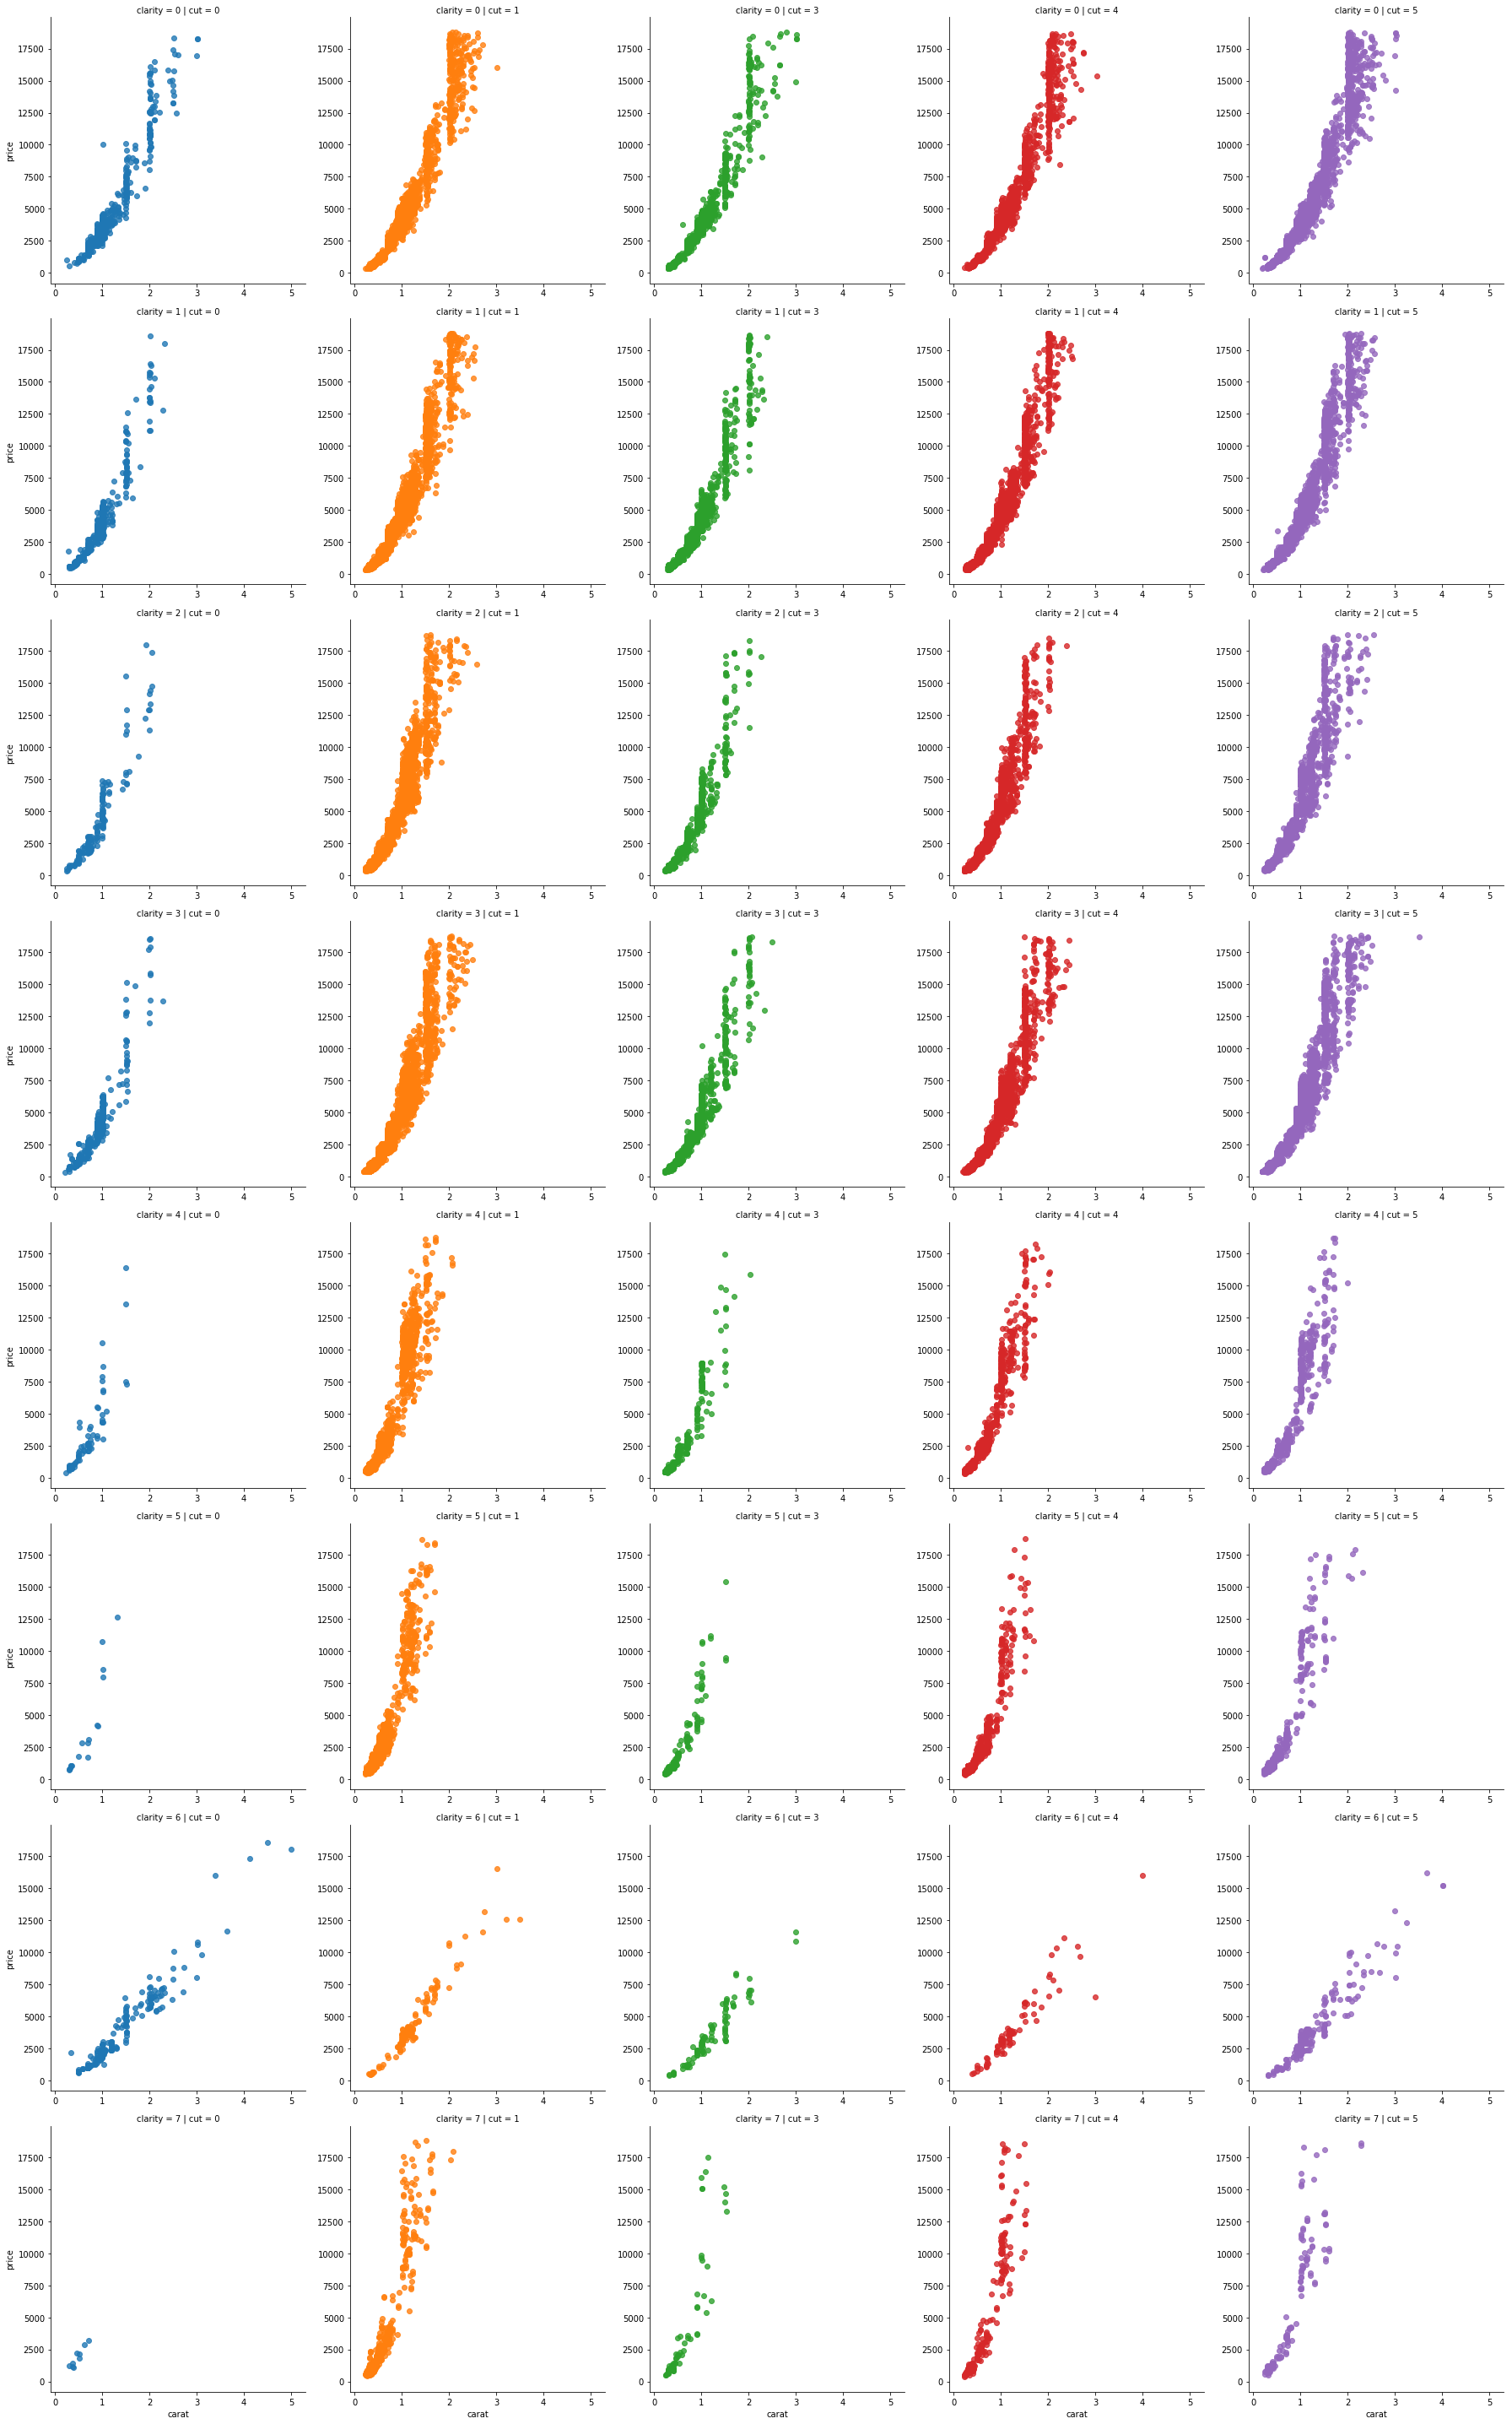

In [194]:
sns.lmplot(x="carat", y="price", col="cut", hue="cut", row = "clarity",  data=ndf, fit_reg=False)

In [232]:
corr = ndf.corr()

In [233]:
ndf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,E,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,I,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,0,63.3,58.0,335,4.34,4.35,2.75


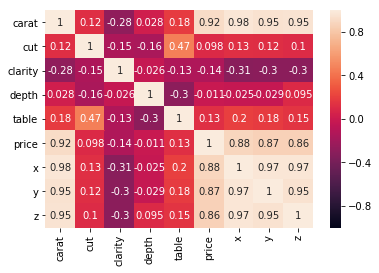

In [234]:
sns.heatmap(corr, vmin= -1, annot= True)

In [246]:
#df.drop('x', 'y', 'z', 'depth' , axis=1)
nndf = ndf.drop(['x', 'y', 'z', 'depth', 'color'], axis=1)
#ndf.drop('y', axis=1)




AttributeError: module 'seaborn' has no attribute 'plt'

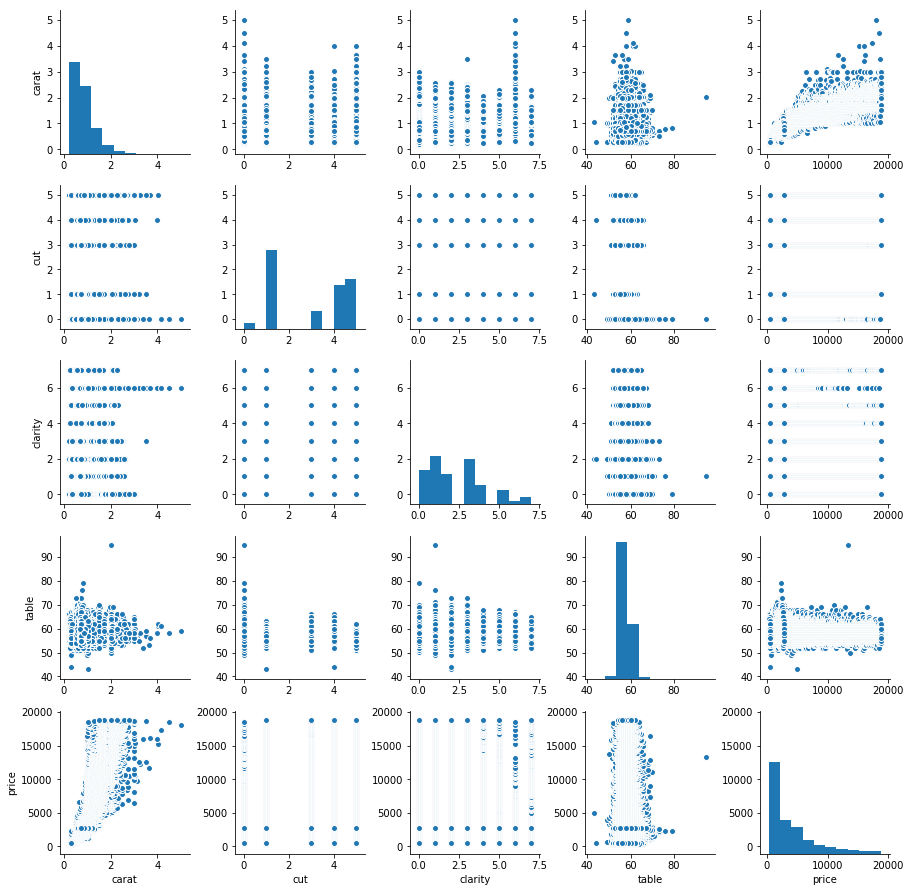

In [212]:
# Basic correlogram
sns.pairplot(nndf)
sns.plt.show()


In [241]:
nndf50 = nndf[nndf['price']<5000]

AttributeError: module 'seaborn' has no attribute 'plt'

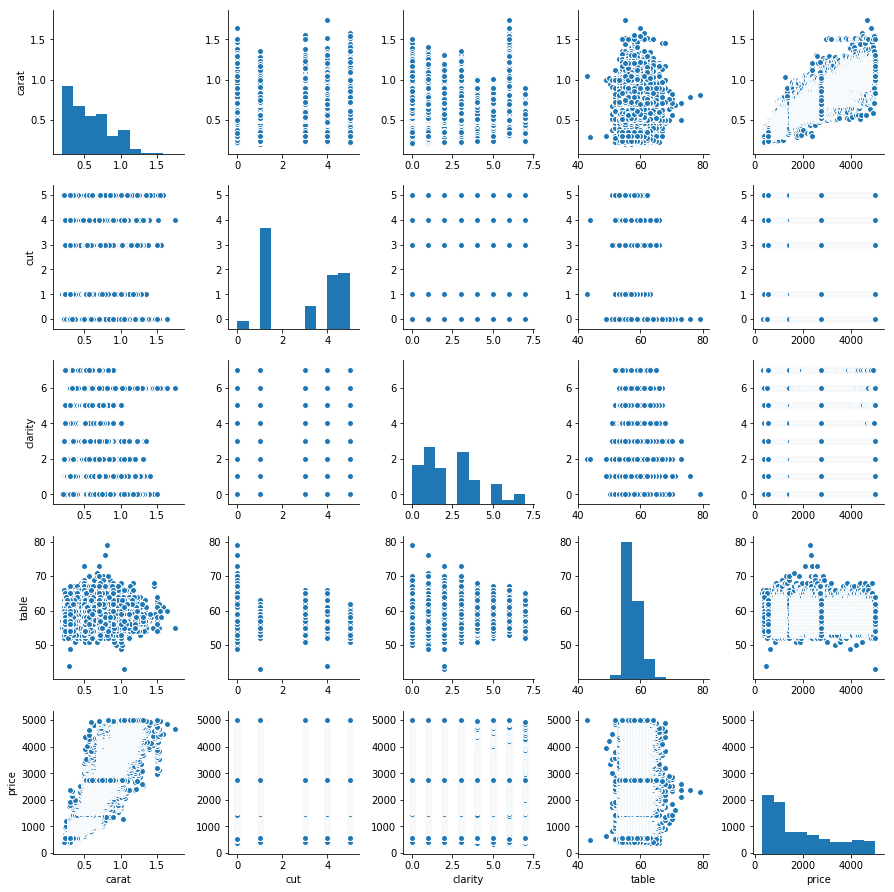

In [242]:
sns.pairplot(nndf50)
sns.plt.show()

In [247]:
nndfhigh = nndf[ndf['price']>5000]

In [248]:
nndfhigh.head()

,carat,cut,clarity,table,price
11416,1.16,1,0,56.0,5001
11417,1.16,1,0,57.0,5001
11418,0.90,3,4,58.0,5001
11419,0.90,4,2,56.0,5001
11420,0.90,5,3,59.0,5001


AttributeError: module 'seaborn' has no attribute 'plt'

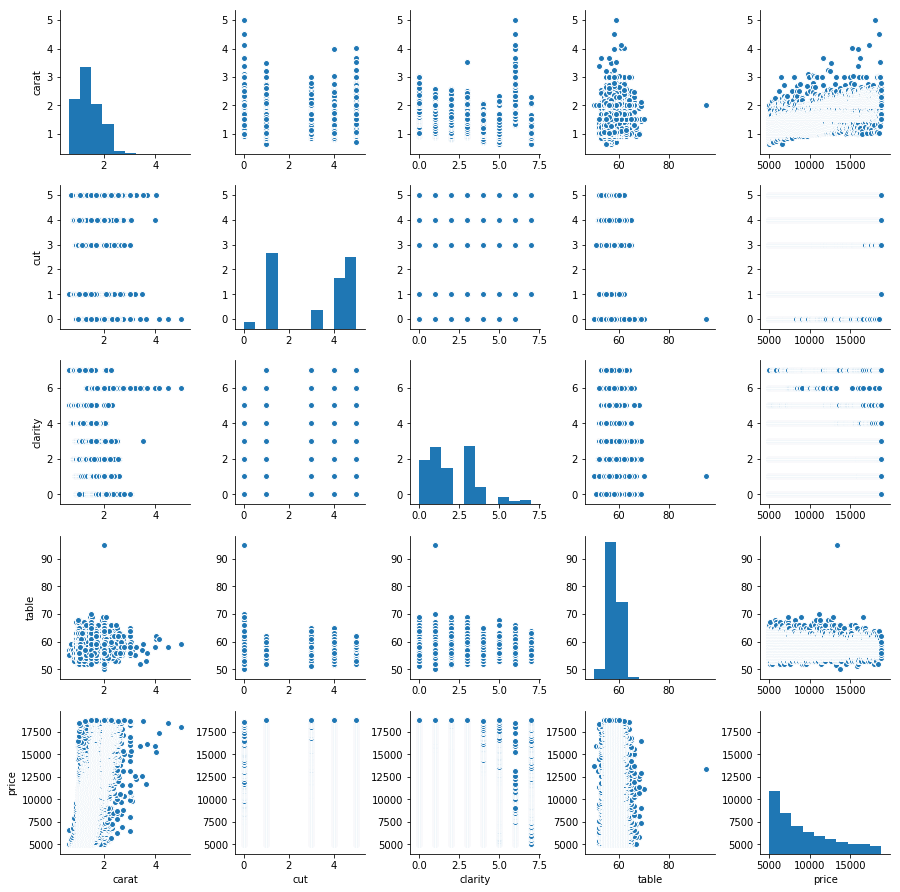

In [249]:
sns.pairplot(nndfhigh)
sns.plt.show()